# Tache 129 - Medicaments

Regarder pour l’acide salicylique s’il est souvent détecté/quantifié et vérifier s’il y a des recommandations.
    
Recherche de la fréquence de détection et quantification de l’acide salicylique.

Résultats:
- l'acide salicylique est peu recherché (~100 prélèvements par an depuis 2021)
- l'acide salicylique n'est quasiment jamais quantifié, fréquence proche de zéro.
[quantification = valtraduite > 0 ]
- il n'y a pas de la limite de qualité indiquée pour l'acide salicylique.
- je n'ai pas trouvé de recommendations de l'ANSES ou autres organismes concernant l'acide salicylique dans l'eau potable.

In [1]:
# [TO RUN]  Packages
import pandas as pd
import duckdb
from pipelines.tasks.config.common import DUCKDB_FILE

pd.set_option("display.max_columns", None)  # show all cols
pd.set_option("display.max_colwidth", None)  # show full width of showing cols
pd.set_option(
    "display.expand_frame_repr", False
)  # print cols side by side as it's supposed to be

con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

In [25]:
# [TO RUN]  Queries

# Pour tous les prélèvements
query = """
SELECT 
edc_prelevements.dateprel, 
edc_prelevements.nomcommuneprinc, 
edc_prelevements.cdreseau, 
edc_prelevements.cdreseauamont, 
edc_resultats.*
FROM edc_prelevements
JOIN edc_resultats
ON edc_prelevements.referenceprel = edc_resultats.referenceprel
WHERE
(dateprel >= '2020-01-01')
AND
libminparametre IN ('Acide salicylique')
AND
cdreseauamont is NULL
"""

res = con.sql(query)
res = res.df()

# Pour la quantification du nombre de prélèvements
query_countglobal = """
SELECT 
cdparametre, 
ANY_VALUE(libminparametre) AS libminparametre, 
COUNT(referenceprel) AS Count, 
year(dateprel) AS Annee
FROM res
GROUP BY cdparametre, Annee
ORDER BY cdparametre,Annee"""

countglobal = con.sql(query_countglobal)
countglobal = countglobal.df()

# Pour la quantification du nombre de quantifications
query_quantif = """SELECT 
ANY_VALUE(cdparametre) AS cdparametre, 
ANY_VALUE(libminparametre) AS libminparametre,
COUNT(CASE WHEN valtraduite!=0 THEN 1 END) AS Count_quantif, 
year(dateprel) AS Annee
FROM res
GROUP BY cdparametre,Annee
ORDER BY cdparametre,Annee"""

res_quantif = con.sql(query_quantif)
res_quantif = res_quantif.df()


# Nombre de prélèvements par an France entière

In [26]:
countglobal

,cdparametre,libminparametre,Count,Annee
0,5355,Acide salicylique,1125,2020
1,5355,Acide salicylique,105,2021
2,5355,Acide salicylique,156,2022
3,5355,Acide salicylique,79,2023
4,5355,Acide salicylique,91,2024


Text(0, 0.5, 'Nombre de prélèvements')

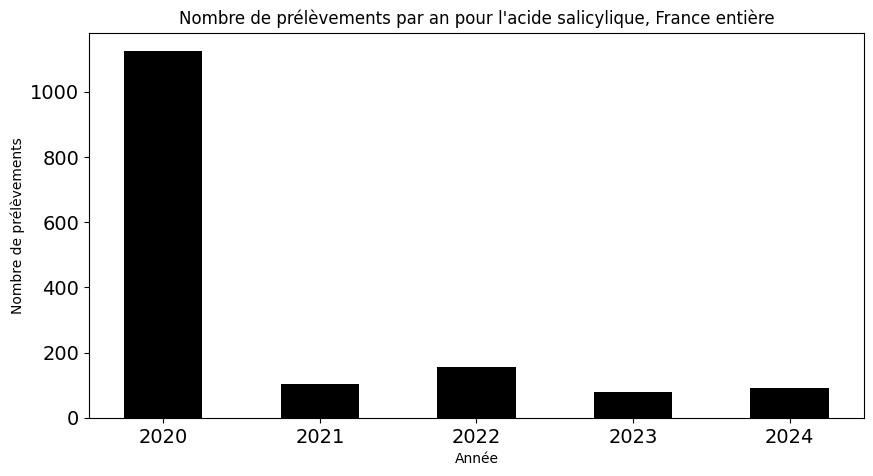

In [28]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 5))
plt.bar(
        [2020, 2021, 2022, 2023, 2024],
        countglobal["Count"],
        width=0.5,
        alpha=1.0,
    color='k'
    )
plt.title("Nombre de prélèvements par an pour l'acide salicylique, France entière")
plt.xticks(fontsize=14)
plt.xlabel("Année")
plt.yticks(fontsize=14)
plt.ylabel("Nombre de prélèvements")

# Nombre de quantifications par an France entière

In [27]:
res_quantif

,cdparametre,libminparametre,Count_quantif,Annee
0,5355,Acide salicylique,0,2020
1,5355,Acide salicylique,0,2021
2,5355,Acide salicylique,2,2022
3,5355,Acide salicylique,0,2023
4,5355,Acide salicylique,1,2024


Text(0, 0.5, 'Nombre de prélèvements')

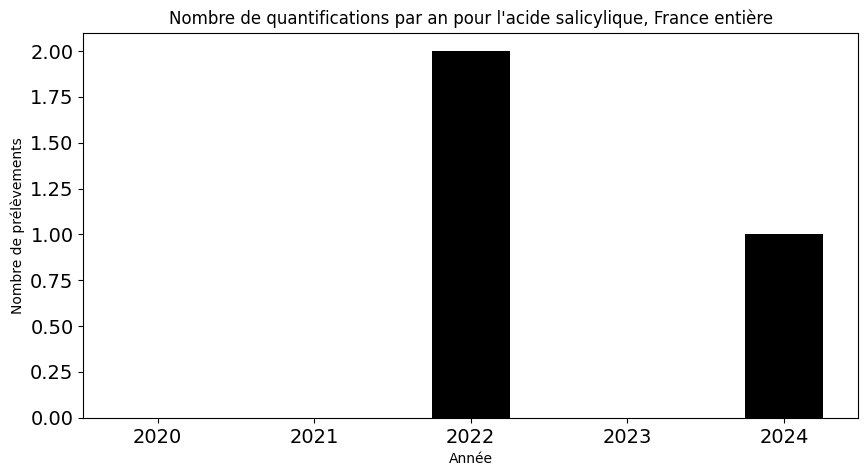

In [29]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 5))
plt.bar(
        [2020, 2021, 2022, 2023, 2024],
        res_quantif["Count_quantif"],
        width=0.5,
        alpha=1.0,
    color='k'
    )
plt.title("Nombre de quantifications par an pour l'acide salicylique, France entière")
plt.xticks(fontsize=14)
plt.xlabel("Année")
plt.yticks(fontsize=14)
plt.ylabel("Nombre de prélèvements")

# Pas de limite de qualité dans la base de données

In [30]:
res[["cdparametre", "libminparametre", "limitequal"]].drop_duplicates()

,cdparametre,libminparametre,limitequal
0,5355,Acide salicylique,None
